In [9]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [10]:
df['month_no'] = pd.to_datetime(df['job_posted_date']).dt.month

In [11]:
df_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_US_exploded = df_US.explode('job_skills')
df_US_pivot = df_US_exploded.pivot_table(index='month_no',columns='job_skills', aggfunc='size', fill_value=0)
df_US_pivot.loc['Total'] = df_US_pivot.sum()
df_US_pivot_sorted = df_US_pivot[df_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_US_pivot_sorted = df_US_pivot_sorted.drop('Total')

In [12]:
df_total = df_US.groupby('month_no').size()
df_US_pivot_sorted = df_US_pivot_sorted.div(df_total/100,axis=0)

df_US_pivot_sorted = df_US_pivot_sorted.reset_index()

df_US_pivot_sorted['month'] = df_US_pivot_sorted['month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')
)

df_US_pivot_sorted = df_US_pivot_sorted.set_index('month')
df_US_pivot_sorted = df_US_pivot_sorted.drop(columns='month_no')

In [13]:
df_total

month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [14]:
df_US_pivot_sorted

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


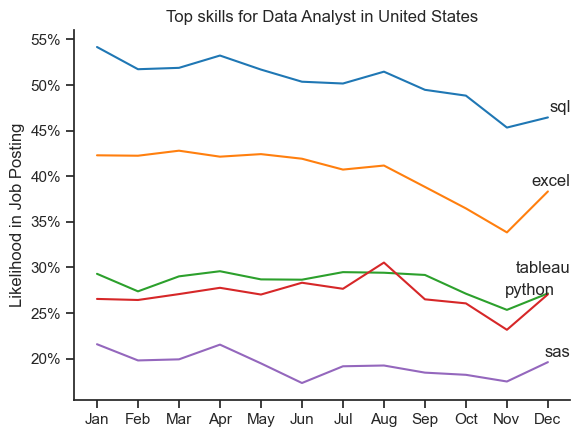

In [19]:
from adjustText import adjust_text

df_plot = df_US_pivot_sorted.iloc[:,:5]
sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top skills for Data Analyst in United States')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i in range(5):
    texts.append(plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i]))

adjust_text(texts)

plt.show()